# Plot the log-likelihood contours of a distribution

In this example, we show how to plot the bidimensionnal log-likelihood contours of function given a sample.

In [1]:
import openturns as ot
ot.RandomGenerator.SetSeed(0)

## Generate a sample

We create a `TruncatedNormal` and generate a small sample.

In [2]:
a = -1
b=2.5
mu = 2.
sigma = 3.
distribution = ot.TruncatedNormal(mu,sigma,a,b)
sample = distribution.getSample(11)

In order to see the distribution and the sample, we draw the PDF of the distribution and generate a clouds which X coordinates are the sample values.

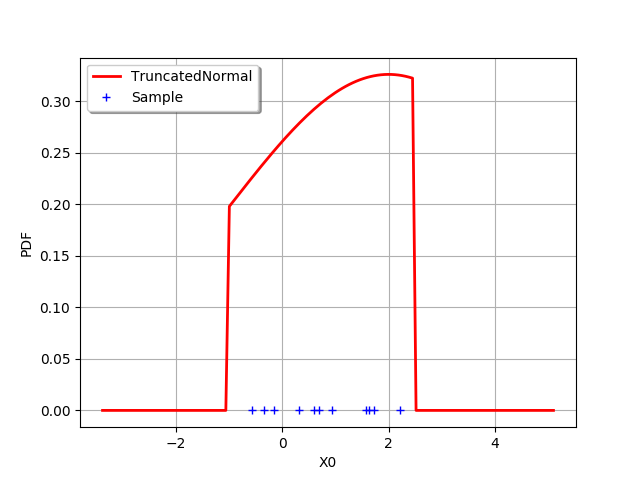

In [3]:
graph = distribution.drawPDF()
graph.setLegends(["TruncatedNormal"])
graph.setColors(["red"])
zeros = ot.Sample(sample.getSize(),1)
cloud = ot.Cloud(sample,zeros)
cloud.setLegend("Sample")
graph.add(cloud)
graph.setLegendPosition("topleft")
graph

The following function computes the log-likelihood of a `TruncatedNormal` which mean and standard deviations are given as input arguments. The lower and upper bounds of the distribution are computed as minimum and maximum of the sample.

## Define the log-likelihood function

The following function evaluates the log-likelihood function given a point X=$(\mu,\sigma$). In order to evaluate the likelihood on the sample, we use a trick: we evaluate the `computeMean` method on the log-PDF sample, then multiply by the sample size. This is much faster than using a `for` loop.

In [4]:
def logLikelihood(X):
    '''
    Evaluate the log-likelihood of a TruncatedNormal on a sample. 
    '''
    mu = X[0]
    sigma = X[1]
    a = sample.getMin()[0]
    b = sample.getMax()[0]
    distribution = ot.TruncatedNormal(mu,sigma,a,b)
    samplesize = sample.getSize()
    samplelogpdf = distribution.computeLogPDF(sample)
    loglikelihood = -samplelogpdf.computeMean()* samplesize
    return loglikelihood

## With the draw method

In this section, we use the `draw` method which is available for any `Function` which has 1 or 2 input arguments. In our case, the log-likelihood function has two inputs: $x_0=\mu$ and $x_1=\sigma$.

Draw the log-likelihood function with the `draw` method: this is much faster than using a `for` loop.

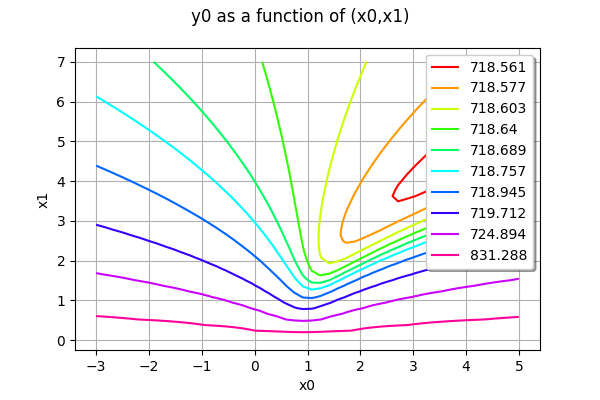

In [5]:
logLikelihoodFunction = ot.PythonFunction(2, 1, logLikelihood)
graphBasic = logLikelihoodFunction.draw([-3.0, 0.1], [5.0, 7.0], [50]*2)
graphBasic

A part of the graphics is hidden by the legends. This is why we fine tune the graphics.

By default each level is a dedicated contour in order to have one color per contour, but they all share the same grid and data. We use the `getDrawable` method to take the first contour as the only one with multiple levels. Then we use the `setLevels` method: we ask for many iso-values in the same data so the color will be the same for all curves. In order to inline the level values, we use the `setDrawLabels` method. Finally, we use the `setDrawables` to substitute the collection of drawables by a collection reduced to this unique contour.

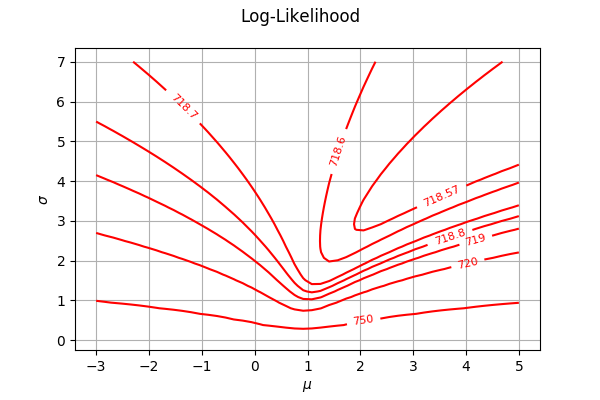

In [6]:
levels = [718.57, 718.6, 718.7, 718.8, 719.,720., 750.]
contours = graphBasic.getDrawable(0)
contours.setLevels(levels)
contours.setDrawLabels(True)
graphFineTune = ot.Graph(graphBasic)
graphFineTune.setDrawables([contours])
graphFineTune.setLegendPosition("") # Remove the legend
# Set the titles
graphFineTune.setTitle("Log-Likelihood")
graphFineTune.setXTitle(r"$\mu$")
graphFineTune.setYTitle(r"$\sigma$")
graphFineTune

## With Matplotlib

In order to create the contour plot, we have to evaluate the log-likelihood function on a grid. This is easy with the `meshgrid` numpy function.

In [7]:
import numpy as np
mu = np.linspace(-3.0, 5.0, 50)
sigma = np.linspace(0.1, 7.0, 50)
MU, SIGMA = np.meshgrid(mu, sigma)
nmu = MU.shape[0]
nsigma = SIGMA.shape[0]
Z = np.zeros((nmu,nsigma))
for i in range(nmu):
    for j in range(nsigma):
        Z[i,j] = logLikelihood([MU[i,j],SIGMA[i,j]])[0]

print(np.min(Z),np.max(Z))

718.5554193435169 5697.465161108012


We use the `contour` function from matplotlib. In order to plot exactly the required contours, we set the `levels` option, which has been fine-tune for this particular graphics.

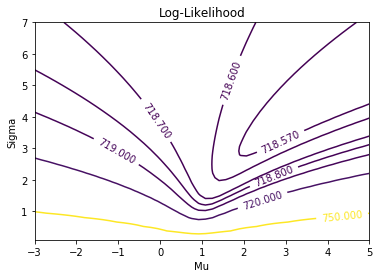

In [8]:
import matplotlib.pyplot as plt

levels = [718.57, 718.6, 718.7, 718.8, 719.,720., 750.]

fig, ax = plt.subplots()
CS = ax.contour(MU, SIGMA, Z, levels = levels)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Log-Likelihood')
ax.set_xlabel("Mu")
ax.set_ylabel("Sigma");

We see that the minimum of the log-likelihood function is in the top right corner of the (mu,sigma) domain.